In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets



In [1]:
#load the dataset
from tensorflow.keras.datasets import mnist

#Separando valores de treino e de teste
(x_treino, y_treino), (x, y) = mnist.load_data()

# Redes Auto-Organizaveis (SOM)



Created cortex layer with shape: (20, 20, 28, 28) 

Trained epoch


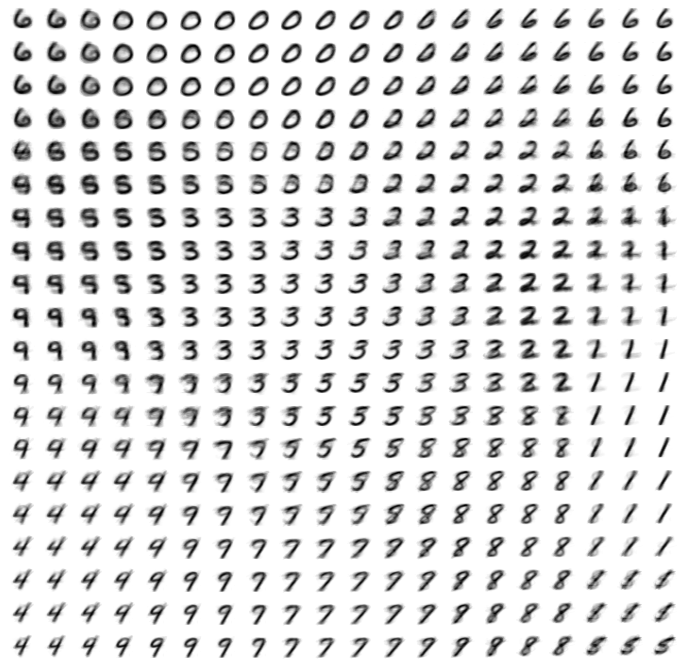

In [7]:
class SOM:
    def __init__(self, input_size=28, dim=(20,20), radius=2, alpha = 0.05, epochs = 1):
        self.dim = dim
        self.input_size = input_size
        self.radius = int(radius)
        self.alpha = float(alpha)
        self.epochs = int(epochs)
        self.cortex = np.random.rand(self.dim[0], self.dim[1], self.input_size, self.input_size)
        self.cortex = np.reshape(self.cortex, (self.dim[0], self.dim[1], self.input_size, self.input_size))
        print("Created cortex layer with shape: %s \n" %(str(self.cortex.shape)))

    def train(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, self.input_size) - self.cortex[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
            self.update_weights(point, vector)
        print('Trained epoch')
        
    def update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= self.dim[0]:
                return False
            elif point[1] < 0 or point[1] >= self.dim[1]:
                return False
            return True
        
        x_diff = -self.radius
        
        # update the weights in the points inside the radius
        while x_diff <= self.radius:
            y_diff = -self.radius
            
            while y_diff <= self.radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, self.input_size) - self.cortex[point[0]+x_diff][point[1]+y_diff]
                    self.cortex[point[0]+x_diff][point[1]+y_diff] += self.alpha * delta
                y_diff += 1
            x_diff += 1
            
    def show(self):
        self.fig, self.axis = plt.subplots(self.dim[0], self.dim[1], figsize= (12,12))
        plt.axis('off')
        plt.xticks(color='w')
        plt.yticks(color='w')

        for i in range(self.dim[0]):
            for j in range(self.dim[1]):
                self.axis[i, j].imshow(self.cortex[i][j], aspect='auto', cmap='gray_r')

        i=0
        for row in self.axis:
            j=0
            for columns in row:
                columns.imshow(self.cortex[i][j], aspect = 'auto', cmap='gray_r')
                columns.axis('off')
                j += 1
            i += 1
            
        plt.savefig("SOMoutput"+str(self.dim[0])+".pdf", quality = 95)
        plt.show()

# Gerando a rede com pesos aleatórios
mnist_SOM = SOM()
# Treinando a rede
mnist_SOM.train(x_treino)
mnist_SOM.show()